In [4]:
import pandas as pd
from scipy.stats import pearsonr

# Load data
df = pd.read_csv('ifcb_spex_i_dolp_1.csv')

# Use column names instead of indices for safer filtering
# This gets the names of the columns at positions 2 through 449
intensity_col_names = df.columns[2:450]

results = []
count_data = df['cryp']

for col_name in intensity_col_names:
    # Skip if it's the same column
    if col_name == 'cryp':
        continue
    
    # Select the intensity data
    intensity_data = df[col_name]
    
    # Handle NaNs: Drop rows where either 'cryp' or the intensity is missing
    # pearsonr requires both arrays to have the same length and no NaNs
    valid_mask = count_data.notna() & intensity_data.notna()
    
    if valid_mask.sum() > 1:  # Need at least 2 points to correlate
        try:
            r, p = pearsonr(count_data[valid_mask], intensity_data[valid_mask])
            results.append({
                'Intensity_Col': col_name, 
                'Correlation': r, 
                'P_Value': p
            })
        except Exception as e:
            print(f"Could not process {col_name}: {e}")

# Convert to DataFrame
corr_df = pd.DataFrame(results)

# Get top 20 by absolute correlation
top_20 = corr_df.reindex(corr_df.Correlation.abs().sort_values(ascending=False).index).head(20)
print(top_20)


            Intensity_Col  Correlation   P_Value
401      396.0478515625nm    -0.315061  0.272559
402   401.6900939941406nm    -0.301182  0.295374
404   413.2168884277344nm    -0.284474  0.324263
403   407.4127502441406nm    -0.273621  0.343852
400     390.48486328125nm    -0.272132  0.346589
405    419.103759765625nm    -0.271690  0.347405
443   717.4198608398438nm    -0.257943  0.373274
409   443.5018310546875nm    -0.254794  0.379344
447   759.1843872070312nm    -0.246259  0.396051
407   431.1302490234375nm    -0.245043  0.398462
411  456.22845458984375nm    -0.244940  0.398667
410  449.82012939453125nm    -0.243389  0.401755
406    425.074462890625nm    -0.230376  0.428146
408  437.27227783203125nm    -0.224459  0.440429
412   462.7280578613281nm    -0.203264  0.485823
416   489.6657409667969nm    -0.191655  0.511582
417   496.6416931152344nm    -0.186499  0.523216
423       540.634765625nm    -0.177476  0.543855
422   533.0408935546875nm    -0.173305  0.553515
421   525.5536499023

/var/folders/hp/_jr7lmf94jj5qpbwr4jfbb_r0000gn/T/ipykernel_1694/4260870145.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_20, x='Correlation', y='Intensity_Col', palette='coolwarm')


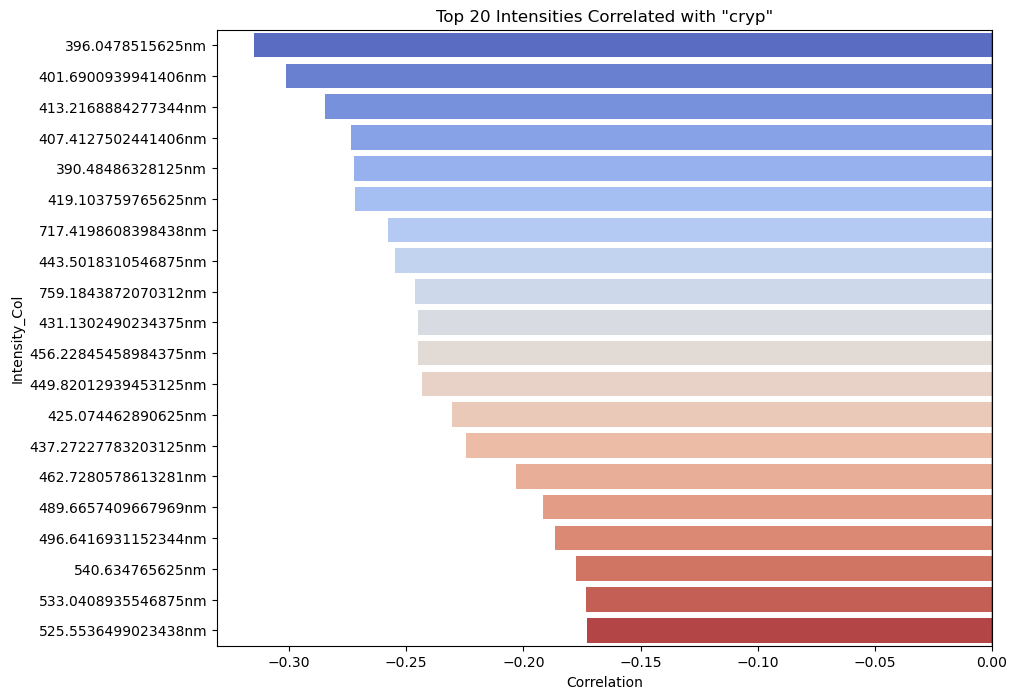

In [9]:
import matplotlib.pyplot as plt  # Changed from 'import matplotlib as plt'
import seaborn as sns

# Only plot the top 20 that are ALSO statistically significant (p < 0.05)
#significant_top_20 = top_20[top_20['P_Value'] < 0.05]

# Ensure top_20 is defined from your previous correlation code
plt.figure(figsize=(10, 8))
sns.barplot(data=top_20, x='Correlation', y='Intensity_Col', palette='coolwarm')
plt.title('Top 20 Intensities Correlated with "cryp"')
plt.axvline(0, color='black', lw=1)

#plt.savefig('/Users/yizhen/Desktop/ifcb_spex_i_dolp_corr.jpg', format='jpeg', dpi=300, bbox_inches='tight')
plt.show()
